In [ ]:
import pandas as pd
import numpy as np

#library that contains punctuation
import string
#importing nlp library
import nltk

## Read data from file

In [ ]:
chunks = pd.read_csv('train_v2.txt', sep="\ \[?.!]", chunksize = 10000, header=None)

<ipython-input-2-239e28e3db2d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  chunks = pd.read_csv('train_v2.txt', sep="\ \[?.!]", chunksize = 10000, header=None)


In [ ]:
# get 1st chunk of size 10000
df = chunks.get_chunk(10000)
df

,0
0,The U.S. Centers for Disease Control and Preve...
1,When Ms. Winfrey invited Suzanne Somers to sha...
2,Elk calling -- a skill that hunters perfected ...
3,Don 't !
4,"Fish , ranked 98th in the world , fired 22 ace..."
...,...
9995,A year ago all 25m recipients of child benefit...
9996,Regulators have to monitor the situation until...
9997,The most stable nuclei occur when the outermos...
9998,Women and men must be equal partners for 21st ...


In [ ]:
# chunk of size 15000
df_large = chunks.get_chunk(15000)
df_large

,0
10000,UnitedHealth 's Simon Stevens said the suggest...
10001,She 'll run against Republican Thomas Pekarek ...
10002,The Taliban said earlier they had handed the t...
10003,"Duncan , 45 , pleaded guilty in December to 10..."
10004,Â Important risk factors that could cause actu...
...,...
24995,"( CBS ) For the past year and a half , several..."
24996,"Heck , he is older than my grandpa ."
24997,The photos were of people they know and didn '...
24998,In several pictures Ms. Maybin has digitally c...



## Preprocess data

In [ ]:
#remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i.lower() for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean']= df[0].apply(lambda x:remove_punctuation(x))
df_large['clean']= df_large[0].apply(lambda x:remove_punctuation(x))

In [ ]:
#defining function for tokenization
# nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens


#applying function to the column
df['clean_tokenized']= df['clean'].apply(lambda x: tokenization(x))
df_large['clean_tokenized']= df_large['clean'].apply(lambda x: tokenization(x))

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df['stemmed']=df['clean_tokenized'].apply(lambda x: stemming(x))
df_large['stemmed']=df_large['clean_tokenized'].apply(lambda x: stemming(x))

In [ ]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

# uncomment next 2 line and download once:
# nltk.download('wordnet')
# nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

#lemmatization function
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['lemmatized'] = df['clean_tokenized'].apply(lambda x:lemmatizer(x))
df_large['lemmatized'] = df_large['clean_tokenized'].apply(lambda x:lemmatizer(x))

In [ ]:
df.head()

,0,clean,clean_tokenized,stemmed,lemmatized
0,The U.S. Centers for Disease Control and Preve...,the us centers for disease control and prevent...,"[the, us, centers, for, disease, control, and,...","[the, us, center, for, diseas, control, and, p...","[the, u, center, for, disease, control, and, p..."
1,When Ms. Winfrey invited Suzanne Somers to sha...,when ms winfrey invited suzanne somers to shar...,"[when, ms, winfrey, invited, suzanne, somers, ...","[when, ms, winfrey, invit, suzann, somer, to, ...","[when, m, winfrey, invited, suzanne, somers, t..."
2,Elk calling -- a skill that hunters perfected ...,elk calling a skill that hunters perfected lo...,"[elk, calling, a, skill, that, hunters, perfec...","[elk, call, a, skill, that, hunter, perfect, l...","[elk, calling, a, skill, that, hunter, perfect..."
3,Don 't !,don t,"[don, t]","[don, t]","[don, t]"
4,"Fish , ranked 98th in the world , fired 22 ace...",fish ranked 98th in the world fired 22 aces ...,"[fish, ranked, 98th, in, the, world, fired, 22...","[fish, rank, 98th, in, the, world, fire, 22, a...","[fish, ranked, 98th, in, the, world, fired, 22..."


In [ ]:
df_large.reset_index(inplace=True)
df_large.head()

,index,0,clean,clean_tokenized,stemmed,lemmatized
0,10000,UnitedHealth 's Simon Stevens said the suggest...,unitedhealth s simon stevens said the suggesti...,"[unitedhealth, s, simon, stevens, said, the, s...","[unitedhealth, s, simon, steven, said, the, su...","[unitedhealth, s, simon, stevens, said, the, s..."
1,10001,She 'll run against Republican Thomas Pekarek ...,she ll run against republican thomas pekarek ...,"[she, ll, run, against, republican, thomas, pe...","[she, ll, run, against, republican, thoma, pek...","[she, ll, run, against, republican, thomas, pe..."
2,10002,The Taliban said earlier they had handed the t...,the taliban said earlier they had handed the t...,"[the, taliban, said, earlier, they, had, hande...","[the, taliban, said, earlier, they, had, hand,...","[the, taliban, said, earlier, they, had, hande..."
3,10003,"Duncan , 45 , pleaded guilty in December to 10...",duncan 45 pleaded guilty in december to 10 f...,"[duncan, 45, pleaded, guilty, in, december, to...","[duncan, 45, plead, guilti, in, decemb, to, 10...","[duncan, 45, pleaded, guilty, in, december, to..."
4,10004,Â Important risk factors that could cause actu...,â important risk factors that could cause actu...,"[â, important, risk, factors, that, could, cau...","[â, import, risk, factor, that, could, caus, a...","[â, important, risk, factor, that, could, caus..."


## Encoding words

In [ ]:
from keras.preprocessing.text import Tokenizer
from itertools import chain

# function to encode data
def encode(data):
    lemma_output = np.concatenate(data['lemmatized'])
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lemma_output.tolist())
    encoded_data = tokenizer.texts_to_sequences(lemma_output.tolist())
    encoded_data = list(chain(*encoded_data))
    
    vocab_length = len(tokenizer.word_index)+1
    print('Vocab length:',vocab_length)

    return encoded_data, vocab_length
    
encoded_data, vocab_length = encode(df)
encoded_data_large, vocab_length_large = encode(df_large)

Vocab length: 23269
Vocab length: 29056


In [ ]:
# function to generate sequences
def sequence_generate(encoded_data):
    sequences = list()
    for i in range(1, len(encoded_data)):
        sequence = encoded_data[i-1:i+1]
        sequences.append(sequence)
    print('Total num of sequences: %d' %len(sequences))
    return sequences

sequences = sequence_generate(encoded_data)
sequences_large = sequence_generate(encoded_data_large)

Total num of sequences: 224421
Total num of sequences: 335476


In [ ]:
sequences[:5]

[[1, 55], [55, 369], [369, 8], [8, 818], [818, 469]]

In [ ]:
sequences_large[:5]

[[13148, 7], [7, 2118], [2118, 3120], [3120, 15], [15, 1]]

## Split Data

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def split_data(sequences, vocab_length):
    # split into text and next word (label)
    sequences = np.array(sequences)
    x,y = sequences[:,0], sequences[:,1]
    y = to_categorical(y, num_classes = vocab_length)
    return x, y

x, y = split_data(sequences, vocab_length)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

x_large, y_large = split_data(sequences_large, vocab_length_large)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(x_large, y_large, test_size=0.20, random_state=42)

## RNN Model - LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

import pickle
from keras.models import load_model

In [ ]:
# Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_length, 10,input_length = 1))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(vocab_length, activation = 'softmax'))
print(rnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             232690    
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 23269)             1186719   
                                                                 
Total params: 1,431,609
Trainable params: 1,431,609
Non-trainable params: 0
_________________________________________________________________
None


#### Train 10K subset data

In [ ]:
# Train RNN model
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)
rnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics =['accuracy'])
history = rnn_model.fit(X_train, y_train, validation_split=0.10, batch_size=128, epochs=100, shuffle=True).history

Epoch 1/100
1263/1263 [==============================] - 46s 34ms/step - loss: 7.3777 - accuracy: 0.0748 - val_loss: 7.1014 - val_accuracy: 0.0957
Epoch 2/100
1263/1263 [==============================] - 38s 30ms/step - loss: 6.6780 - accuracy: 0.1115 - val_loss: 7.0590 - val_accuracy: 0.1063
Epoch 3/100
1263/1263 [==============================] - 38s 30ms/step - loss: 6.3200 - accuracy: 0.1307 - val_loss: 7.1493 - val_accuracy: 0.1103
Epoch 4/100
1263/1263 [==============================] - 40s 31ms/step - loss: 6.0101 - accuracy: 0.1464 - val_loss: 7.2964 - val_accuracy: 0.1109
Epoch 5/100
1263/1263 [==============================] - 39s 31ms/step - loss: 5.7510 - accuracy: 0.1579 - val_loss: 7.4673 - val_accuracy: 0.1093
Epoch 6/100
1263/1263 [==============================] - 39s 31ms/step - loss: 5.5531 - accuracy: 0.1648 - val_loss: 7.6082 - val_accuracy: 0.1122
Epoch 7/100
1263/1263 [==============================] - 39s 31ms/step - loss: 5.4017 - accuracy: 0.1700 - val_loss: 7

In [ ]:
# Save trained model
rnn_model.save('rnn_model.h5')
pickle.dump(history, open("history_rnn.p", "wb"))

In [ ]:
# Load saved trained model
rnn_model = load_model('rnn_model.h5')
history_rnn = pickle.load(open("history_rnn.p", "rb"))

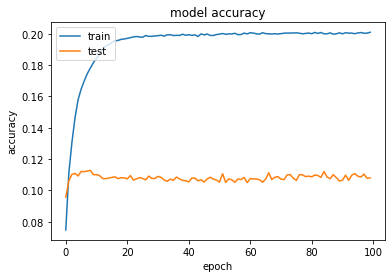

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history_rnn['accuracy'])
plt.plot(history_rnn['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_rnn = rnn_model.predict(X_test)

1403/1403 [==============================] - 23s 15ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rnn_rmse = mean_squared_error(y_test, y_pred_rnn, squared=False)
print("Root Mean Square Error:",rnn_rmse)

Root Mean Square Error: 0.003137066


#### Train 15K subset data

In [ ]:
# Build RNN model
rnn_model_l = Sequential()
rnn_model_l.add(Embedding(vocab_length_large, 10,input_length = 1))
rnn_model_l.add(LSTM(50))
rnn_model_l.add(Dense(vocab_length_large, activation = 'softmax'))
print(rnn_model_l.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             290560    
                                                                 
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dense_1 (Dense)             (None, 29056)             1481856   
                                                                 
Total params: 1,784,616
Trainable params: 1,784,616
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train RNN model
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
rnn_model_l.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics =['accuracy'])
history_large = rnn_model_l.fit(X_train_l, y_train_l, validation_split=0.10, batch_size=128, epochs=50, shuffle=True).history

Epoch 1/50
1888/1888 [==============================] - 66s 34ms/step - loss: 7.2145 - accuracy: 0.0879 - val_loss: 7.0121 - val_accuracy: 0.1045
Epoch 2/50
1888/1888 [==============================] - 64s 34ms/step - loss: 6.6105 - accuracy: 0.1184 - val_loss: 6.9931 - val_accuracy: 0.1138
Epoch 3/50
1888/1888 [==============================] - 64s 34ms/step - loss: 6.2675 - accuracy: 0.1349 - val_loss: 7.0749 - val_accuracy: 0.1160
Epoch 4/50
1888/1888 [==============================] - 64s 34ms/step - loss: 5.9977 - accuracy: 0.1447 - val_loss: 7.1938 - val_accuracy: 0.1165
Epoch 5/50
1888/1888 [==============================] - 65s 34ms/step - loss: 5.7937 - accuracy: 0.1515 - val_loss: 7.3332 - val_accuracy: 0.1142
Epoch 6/50
1888/1888 [==============================] - 64s 34ms/step - loss: 5.6395 - accuracy: 0.1566 - val_loss: 7.4416 - val_accuracy: 0.1161
Epoch 7/50
1888/1888 [==============================] - 64s 34ms/step - loss: 5.5223 - accuracy: 0.1620 - val_loss: 7.5548 -

In [ ]:
# Save trained model
rnn_model_l.save('rnn_model_large.h5')
pickle.dump(history_large, open("history_rnn_large.p", "wb"))

In [ ]:
# Load saved trained model
rnn_model_l = load_model('rnn_model_large.h5')
history_rnn_large = pickle.load(open("history_rnn_large.p", "rb"))

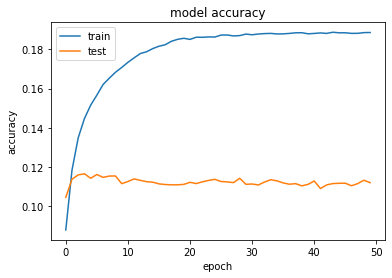

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt 

plt.plot(history_rnn_large['accuracy'])
plt.plot(history_rnn_large['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_rnn_l = rnn_model_l.predict(X_test_l)

2097/2097 [==============================] - 6s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rnn_rmse = mean_squared_error(y_test_l, y_pred_rnn_l, squared=False)
print("Root Mean Square Error:",rnn_rmse)

Root Mean Square Error: 0.002673774


## Multilayer Perceptron Model (MLP)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

input_shape = (1,)
mlp_model = Sequential()
mlp_model.add(Dense(16, input_shape= input_shape))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))
print(mlp_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None


#### Train MLP for 10K subset data

In [ ]:
# Train MLP model
from keras.optimizers import Adagrad

opt = Adagrad(learning_rate=0.001)
mlp_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['accuracy'])
history_mlp = mlp_model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.10, shuffle=True).history

Epoch 1/10
1263/1263 [==============================] - 21s 16ms/step - loss: 1.9085 - accuracy: 0.8679 - val_loss: 0.3494 - val_accuracy: 0.8251
Epoch 2/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.4215 - accuracy: 0.9103 - val_loss: 0.3407 - val_accuracy: 0.8271
Epoch 3/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.3224 - accuracy: 0.9228 - val_loss: 0.1388 - val_accuracy: 1.0000
Epoch 4/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.2720 - accuracy: 0.9319 - val_loss: 0.2078 - val_accuracy: 0.8774
Epoch 5/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.2397 - accuracy: 0.9369 - val_loss: 0.0678 - val_accuracy: 0.9614
Epoch 6/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.2172 - accuracy: 0.9443 - val_loss: 0.1322 - val_accuracy: 1.0000
Epoch 7/10
1263/1263 [==============================] - 19s 15ms/step - loss: 0.1999 - accuracy: 0.9473 - val_loss: 0.1313 -

In [ ]:
# Save trained model
mlp_model.save('mlp_model.h5')
pickle.dump(history_mlp, open("history_mlp.p", "wb"))

In [ ]:
# Load trained model
mlp_model = load_model('mlp_model.h5')
history_mlp = pickle.load(open("history_mlp.p", "rb"))

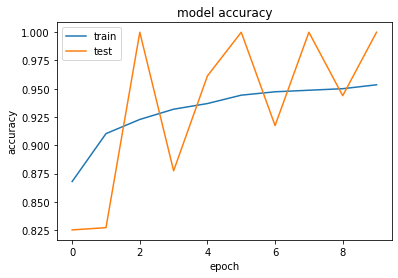

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history_mlp['accuracy'])
plt.plot(history_mlp['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp =to_categorical(y_pred_mlp,num_classes =vocab_length)

1403/1403 [==============================] - 1s 668us/step


In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred_mlp, squared=False)
rms

0.0029561322

#### Train 15K subset data

In [ ]:
# Train MLP model
history_mlp_l = mlp_model.fit(X_train_l, y_train_l, epochs=10, batch_size=128, verbose=1, validation_split=0.10, shuffle=True).history

Epoch 1/10
1888/1888 [==============================] - 40s 21ms/step - loss: 0.1858 - accuracy: 0.9525 - val_loss: 0.3981 - val_accuracy: 0.8199
Epoch 2/10
1888/1888 [==============================] - 35s 19ms/step - loss: 0.1721 - accuracy: 0.9535 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 3/10
1888/1888 [==============================] - 36s 19ms/step - loss: 0.1609 - accuracy: 0.9574 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 4/10
1888/1888 [==============================] - 36s 19ms/step - loss: 0.1520 - accuracy: 0.9593 - val_loss: 0.7945 - val_accuracy: 0.7390
Epoch 5/10
1888/1888 [==============================] - 36s 19ms/step - loss: 0.1450 - accuracy: 0.9611 - val_loss: 0.2396 - val_accuracy: 1.0000
Epoch 6/10
1888/1888 [==============================] - 36s 19ms/step - loss: 0.1376 - accuracy: 0.9632 - val_loss: 0.0774 - val_accuracy: 1.0000
Epoch 7/10
1888/1888 [==============================] - 36s 19ms/step - loss: 0.1317 - accuracy: 0.9635 - val_loss: 0.2355 -

In [ ]:
# Save trained model
mlp_model.save('mlp_model_large.h5')
pickle.dump(history_mlp_l, open("history_mlp_large.p", "wb"))

In [ ]:
# Load trained model
mlp_model_large = load_model('mlp_model_large.h5')
history_mlp_large = pickle.load(open("history_mlp_large.p", "rb"))

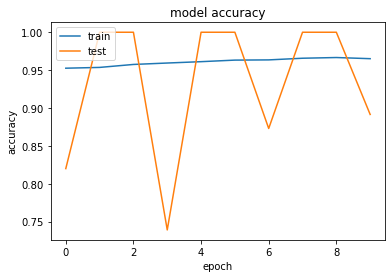

In [ ]:
# Plot training and validation accuracy
plt.plot(history_mlp_large['accuracy'])
plt.plot(history_mlp_large['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_mlp = mlp_model_large.predict(X_test_l)
y_pred_mlp = to_categorical(y_pred_mlp, num_classes = vocab_length_large)

2097/2097 [==============================] - 1s 634us/step


In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_pred_mlp, y_test_l, squared=False)
rms

0.0025541007

## CNN Model

In [ ]:
from keras.layers import Flatten

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

cnn_model = Sequential()  
cnn_model.add(Embedding(vocab_length, 10,input_length = 1))
cnn_model.add(Conv1D(1, 3, padding='same', activation='relu'))
#cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(vocab_length, activation='relu'))
cnn_model.add(Dense(vocab_length, activation='sigmoid'))
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             232690    
                                                                 
 conv1d (Conv1D)             (None, 1, 1)              31        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 23269)             46538     
                                                                 
 dense_1 (Dense)             (None, 23269)             541469630 
                                                                 
Total params: 541,748,889
Trainable params: 541,748,889
Non-trainable params: 0
_________________________________________________________________
None


#### Train for 10K subset data

In [ ]:
# Train CNN model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train,y_train,epochs= 3, batch_size=512, verbose=1,validation_split=0.1, shuffle=True).history

Epoch 1/3
316/316 [==============================] - 3690s 12s/step - loss: 7.6295 - accuracy: 0.0613 - val_loss: 7.4166 - val_accuracy: 0.0602
Epoch 2/3
316/316 [==============================] - 3650s 12s/step - loss: 7.2382 - accuracy: 0.0660 - val_loss: 7.3787 - val_accuracy: 0.0684
Epoch 3/3
316/316 [==============================] - 3650s 12s/step - loss: 7.1109 - accuracy: 0.0721 - val_loss: 7.3775 - val_accuracy: 0.0718


In [ ]:
# Save trained model
cnn_model.save('cnn_model.h5')
pickle.dump(history_cnn, open("history_cnn.p", "wb"))

In [ ]:
# Load trained model
cnn_model = load_model('cnn_model.h5')
history_cnn = pickle.load(open("history_cnn.p", "rb"))

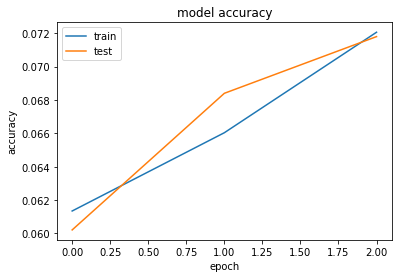

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history_cnn['accuracy'])
plt.plot(history_cnn['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_cnn = cnn_model.predict(X_test)

1403/1403 [==============================] - 1083s 771ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_pred_cnn, y_test, squared=False)
rms

0.12290194

#### Train for 15K subset data

In [ ]:
from keras.layers import Flatten

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

cnn_model = Sequential()  
cnn_model.add(Embedding(vocab_length_large, 10,input_length = 1))
cnn_model.add(Conv1D(1, 3, padding='same', activation='relu'))
#cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(vocab_length_large, activation='relu'))
cnn_model.add(Dense(vocab_length_large, activation='sigmoid'))
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             290560    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 1)              31        
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 29056)             58112     
                                                                 
 dense_3 (Dense)             (None, 29056)             844280192 
                                                                 
Total params: 844,628,895
Trainable params: 844,628,895
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train CNN model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn_large = cnn_model.fit(X_train_l,y_train_l, epochs= 3, batch_size=512, verbose=1,validation_split=0.1, shuffle=True).history

Epoch 1/3
472/472 [==============================] - 6308s 13s/step - loss: 7.5836 - accuracy: 0.0616 - val_loss: 7.3720 - val_accuracy: 0.0654
Epoch 2/3
472/472 [==============================] - 6820s 14s/step - loss: 7.2048 - accuracy: 0.0693 - val_loss: 7.3278 - val_accuracy: 0.0704
Epoch 3/3
472/472 [==============================] - 6813s 14s/step - loss: 7.0923 - accuracy: 0.0744 - val_loss: 7.3328 - val_accuracy: 0.0714


In [ ]:
# Save trained model
cnn_model.save('cnn_model_large.h5')
pickle.dump(history_cnn_large, open("history_cnn_large.p", "wb"))

In [ ]:
# Load trained model
cnn_model_large = load_model('cnn_model_large.h5')
history_cnn_large = pickle.load(open("history_cnn_large.p", "rb"))

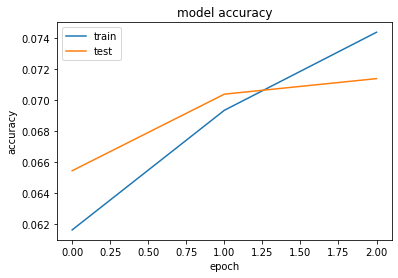

In [ ]:
# Plot training and validation accuracy
plt.plot(history_cnn_large['accuracy'])
plt.plot(history_cnn_large['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred_cnn = cnn_model.predict(X_test_l)

2097/2097 [==============================] - 1916s 913ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_pred_cnn, y_test_l, squared=False)
print("Root Mean Square Error:",rms)

Root Mean Square Error: 0.1043818


## KNN Model

In [ ]:
from sklearn.impute import KNNImputer
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
import matplotlib.pyplot as plt

In [ ]:
final_df = pd.DataFrame(df_large['lemmatized'])
knn_strings = []
knn_len = []
for i in tqdm(range(final_df.shape[0])):
    len_row = len(final_df.iloc[i,0])
    knn_len.append(len_row)
    temp = np.array(final_df.iloc[i,0])
    temp_str = " ".join(temp)
    knn_strings.append(temp_str.lower())

knn_tokenizer = Tokenizer()
knn_tokenizer.fit_on_texts(knn_strings)
knn_encoded_data = knn_tokenizer.texts_to_sequences(knn_strings)
knn_encoded_data = pad_sequences(knn_encoded_data, padding='post', value=0)
knn_encoded_data = knn_encoded_data.astype(float)

100%|██████████| 15000/15000 [00:00<00:00, 16297.14it/s]


In [ ]:
def runKnn(knn_encoded_data, knn_missing_value, knn_expected_value, missing_positions, missing_data_size, n_neighbor):
    imputer = KNNImputer(n_neighbors=n_neighbor)
    imputer.fit(knn_encoded_data)
    knn_output = imputer.transform(knn_missing_value)

    correct_guess = 0
    counter = 0
    for i in range(missing_data_size):
        if missing_positions[i] > 0:
            if -1.0 < knn_expected_value[i][missing_positions[i]] - knn_output[i][missing_positions[i]] < 1.0:
                correct_guess += 1
    return ( correct_guess / missing_data_size ) * 100

In [ ]:
def runKnnForDataset(datasetSize, train_test_ratio):
    if datasetSize <= len(knn_encoded_data) and train_test_ratio < 1.0:
        print('Running KNN for dataset size:', datasetSize)

        current_data_set = np.copy(knn_encoded_data[:datasetSize])
        
        missing_data_size = int(datasetSize * (1 - train_test_ratio))
        missing_positions = []
        for i in range(missing_data_size):
            if knn_len[i] > 3:
                missing_positions.append(random.randint(1,(knn_len[i]-1)))
            else:
                missing_positions.append(-1)

        knn_train_data = np.copy(current_data_set[missing_data_size:])
        knn_test_data = np.copy(current_data_set[0:missing_data_size])
        knn_test_output = np.copy(current_data_set[0:missing_data_size])
        
        for i in range(len(missing_positions)):
            if missing_positions[i] > 0:
                knn_test_data[i][missing_positions[i]] = np.nan

        runStats = {}
        for i in range(1,10):
            runStats[i] = runKnn(knn_train_data,
                                    knn_test_data,
                                    knn_test_output,
                                    missing_positions,
                                    missing_data_size,
                                    i)
            print('\t Accuracy for n_neighbour:' + str(i) + ' is => ' + str(runStats[i]))
            
        # Plot graph
        plt.plot(runStats.values())
        plt.show()
    else:
        print('Param values not allowed!')

Running KNN for dataset size: 10000
	 Accuracy for n_neighbour:1 is => 0.7003501750875438
	 Accuracy for n_neighbour:2 is => 0.3501750875437719
	 Accuracy for n_neighbour:3 is => 0.2001000500250125
	 Accuracy for n_neighbour:4 is => 0.3001500750375188
	 Accuracy for n_neighbour:5 is => 0.2001000500250125
	 Accuracy for n_neighbour:6 is => 0.10005002501250625
	 Accuracy for n_neighbour:7 is => 0.0
	 Accuracy for n_neighbour:8 is => 0.10005002501250625
	 Accuracy for n_neighbour:9 is => 0.1500750375187594


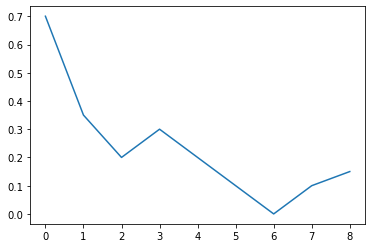

Running KNN for dataset size: 15000
	 Accuracy for n_neighbour:1 is => 0.9003001000333445
	 Accuracy for n_neighbour:2 is => 0.3001000333444481
	 Accuracy for n_neighbour:3 is => 0.4334778259419807
	 Accuracy for n_neighbour:4 is => 0.46682227409136384
	 Accuracy for n_neighbour:5 is => 0.33344448149383127
	 Accuracy for n_neighbour:6 is => 0.4334778259419807
	 Accuracy for n_neighbour:7 is => 0.33344448149383127
	 Accuracy for n_neighbour:8 is => 0.23341113704568192
	 Accuracy for n_neighbour:9 is => 0.3001000333444481


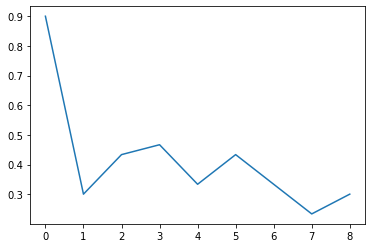

In [ ]:
train_test_ratio = 0.8
data_set_size = [10000, 15000]
for size in data_set_size:
    runKnnForDataset(size, train_test_ratio)